In [284]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [285]:
class Pomiary:
    def __init__(self, adres):
        self.df=pd.read_excel(adres, header=12)
        self.df.dropna(axis='columns',inplace=True)
        self.df.drop(labels='Visible', axis='columns', inplace=True)
        self.lamb=np.array(self.df[self.df.columns[1]].values.tolist())
        self.wyniki=np.array([self.df[self.df.columns[i]].values.tolist() for i in range(len(self.df.columns))[2:]])
    def wykres(self):
        for i in range(len(self.wyniki)):
            plt.plot(self.lamb, self.wyniki[i])
        plt.xlabel('$\lambda$ [nm]')
        plt.ylabel('$A$ [-]')
        plt.show()
        pass
    def krzywakal(self,typ):
        interwal=np.arange(2,11,1)/10
        CFe=10
        CCo=50
        if typ == 'Co':
            kal=np.array([self.wyniki[i][37] for i in range(len(self.wyniki))])
            Ckal=interwal*CCo
        if typ == 'Fe':
            kal=np.array([self.wyniki[i][113] for i in range(len(self.wyniki))])
            Ckal=interwal*CFe
        a=np.polyfit(Ckal, kal,1)[0]
        b=np.polyfit(Ckal, kal,1)[1]
        r=np.polyfit(Ckal, kal,1,full=True)[1]
        R2=1 - r / sum((kal - kal.mean())**2) 
        self.kal=kal
        self.Ckal=Ckal
        self.eps=self.kal/(self.Ckal*0.1)
        self.eps=[self.eps.mean(), self.eps.std()]
        return [a,b], R2
    def stezenie(self,a,b,typ):
        if typ == 'Co':
            win=np.array([self.wyniki[i][37] for i in range(len(self.wyniki))])
        if typ == 'Fe':
            win=np.array([self.wyniki[i][113] for i in range(len(self.wyniki))])
        self.std= np.std(win.reshape(-1, 3), axis=1)
        win = np.average(win.reshape(-1, 3), axis=1)
        self.win=win
        self.C=(win-b)/a
        return self.C, [self.win, self.std]


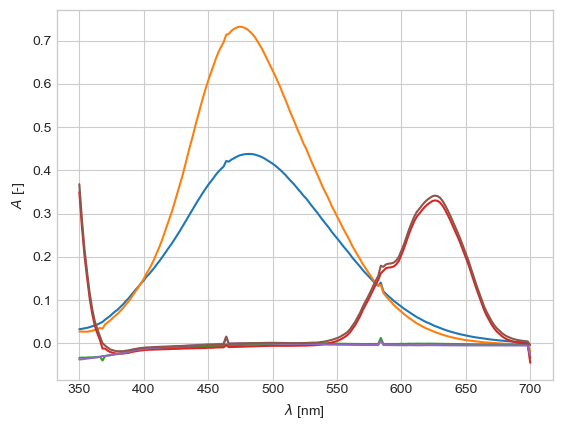

In [286]:
jakos=Pomiary('jakosciowe.xlsx')
jakos.wykres()

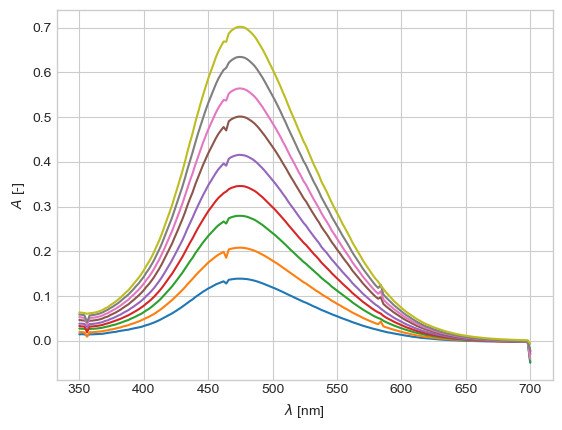

In [287]:
kalFe=Pomiary('kalibracyjna Fe3+.xlsx') #lam=474 nm
kalFe.wykres()
afe, bfe= kalFe.krzywakal('Fe')[0]

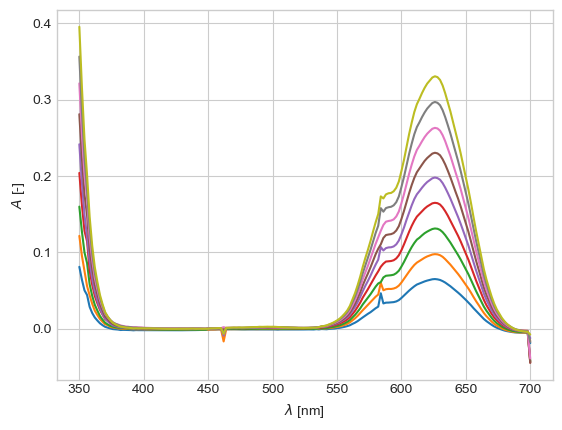

In [288]:
kalCo=Pomiary("kalibracyjna Co2+.xlsx") #lam=626 nm
kalCo.wykres()
aco, bco= kalCo.krzywakal('Co')[0]


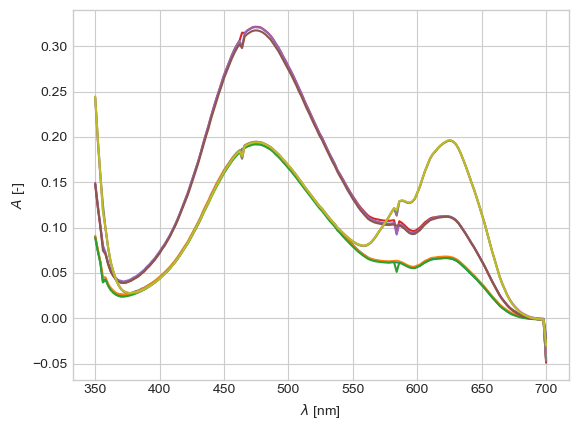

(array([2.78502887, 4.57479692, 2.80335895]),
 [array([0.193     , 0.31993333, 0.1943    ]),
  array([0.00115181, 0.00179877, 0.00021602])])

In [289]:
probFe=Pomiary("próbki na Fe.xlsx")
probFe.wykres()
probFe.stezenie(afe,bfe,'Fe')

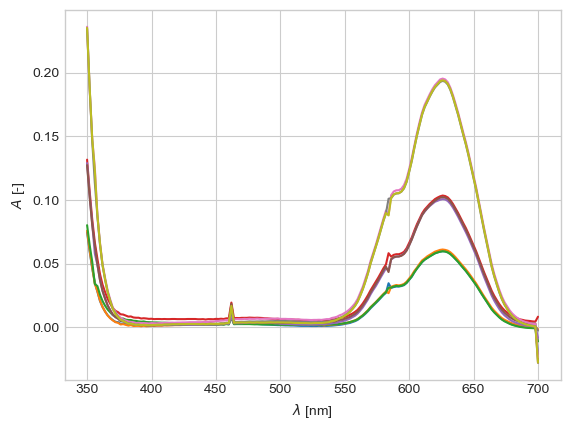

(array([ 9.26160656, 15.594286  , 29.50706705]),
 [array([0.0602    , 0.10216667, 0.19436667]),
  array([0.0006377 , 0.00114698, 0.00075865])])

In [290]:
probCo=Pomiary('próbki z AA na Co2+.xlsx')
probCo.wykres()
probCo.stezenie(aco,bco,'Co')

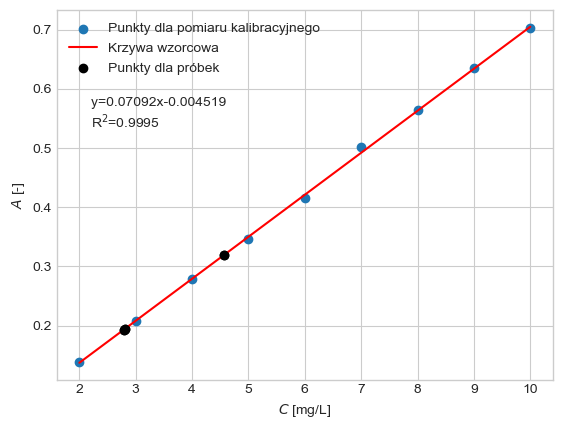

In [291]:
plt.scatter(kalFe.Ckal,kalFe.kal, label='Punkty dla pomiaru kalibracyjnego')
zakres=np.array([kalFe.Ckal[0],kalFe.Ckal[-1]])
plt.plot(zakres,afe*zakres+bfe, color='r',label='Krzywa wzorcowa')
plt.scatter(probFe.stezenie(afe,bfe,'Fe')[0],probFe.stezenie(afe,bfe,'Fe')[1][0], color='k', marker='o', label="Punkty dla próbek")
plt.errorbar(probFe.stezenie(afe,bfe,'Fe')[0],probFe.stezenie(afe,bfe,'Fe')[1][0],yerr=probFe.stezenie(afe,bfe,'Fe')[1][1], color='k', fmt='o')
plt.style.use('seaborn-whitegrid')
plt.xlabel('$C$ [mg/L]')
plt.ylabel('$A$ [-]')
plt.text(kalFe.Ckal[0]+0.2,kalFe.kal[-2]-0.1,'y=0.07092x-0.004519 \nR$^2$=0.9995')
plt.legend()
plt.show()

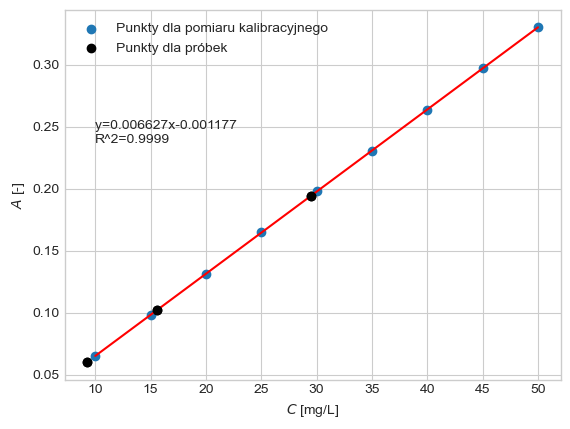

In [292]:
plt.scatter(kalCo.Ckal,kalCo.kal, label='Punkty dla pomiaru kalibracyjnego')
zakres=np.array([kalCo.Ckal[0],kalCo.Ckal[-1]])
plt.scatter(probCo.stezenie(aco,bco,'Co')[0],probCo.stezenie(aco,bco,'Co')[1][0], color='k', marker='o', label="Punkty dla próbek")
plt.errorbar(probCo.stezenie(aco,bco,'Co')[0],probCo.stezenie(aco,bco,'Co')[1][0],yerr=probCo.stezenie(aco,bco,'Co')[1][1], color='k', fmt='o')
plt.style.use('seaborn-whitegrid')
plt.xlabel('$C$ [mg/L]')
plt.ylabel('$A$ [-]')
plt.legend()
plt.text(kalCo.Ckal[0],kalCo.kal[-2]-0.06,'y=0.006627x-0.001177 \nR^2=0.9999')
plt.plot(zakres,aco*zakres+bco, color='r',label='Krzywa wzorcowa')
plt.show()

In [293]:
kalFe.eps, kalCo.eps

([0.699819135802469, 0.007495244542265521],
 [0.06576505291005291, 0.0003265549228443612])

In [297]:
cfe=probFe.stezenie(afe,bfe,'Fe')[0]
cco=probCo.stezenie(aco,bco,'Co')[0]
cfe, cco= cfe*5, cco*5
mfe=cfe*0.2*55.845/1000 #[g] 
mco=cco*0.2*58.933195/1000 #[g]
m=mco+mfe
percfe=mfe/m
percco=mco/m
percfe, percco, m

(array([0.22175921, 0.21752184, 0.08259226]),
 array([0.77824079, 0.78247816, 0.91740774]),
 array([0.701346  , 1.17450063, 1.89549932]))